In [1]:
##############  u===2   MLP_encode_100 and MLP_encode_1000  :654    ##################
import torch
#import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


import torch

import torch.nn as nn
import torch.optim as optim


from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from mnist_test import Net, train, test


# Network parameters
class Params(object):
    batch_size = 64
    test_batch_size = 20
    epochs = 5
    lr = 0.01
    momentum = 0.5
    no_cuda = True
    seed = 1
    log_interval = 10
    
    def __init__(self):
        pass

args = Params()
torch.manual_seed(args.seed)
#device = torch.device("cpu")
device=torch.device('cuda')
kwargs = {}
nfm_config = \
{
    'n_class':9,
   
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.3)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
import Trainer

def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


import pandas as pd 

from sklearn.model_selection import train_test_split




def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output

class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
        
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        #print("df:",df)
        df=df.iloc[:,1:]
        #print("df:",df)
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(float(i)))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)##############
            #print("i,data:",i,data)
            #data=pd.DataFrame(data,dtype=float)###############
            data=np.array(data)##
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
    
    
    
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
        
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        #print("df:",df)
        df=df.iloc[:,1:]
        #print("df:",df)
        print(df.shape)
        #print("df:",df)
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(float(i)))
        #print('labels:',i,labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)##############
            #print("i,data:",i,data)
            #data=pd.DataFrame(data,dtype=float)###############
            data=np.array(data)##
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info

    

        
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics
#LRP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

from innvestigator import InnvestigateModel
from utils import Flatten


inn_model = InnvestigateModel(model, lrp_exponent=2,
                              method="e-rule",
                              beta=.5)


def train_epoch(train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #loss_score=torch.tensor([[]]).cuda()
    #
    #loss_op=0
    loss2_list=[]
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
        x_row,x_col=x.shape   
        x=torch.tensor(x,dtype=torch.float)
        #print(x.shape)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]#########
        #print(labels_int)
        #print('labels_int:',labels_int.shape)
        #print('labels:',labels) 
        #print('x:',x.shape)
        loss_op=0
       
        optimizer.zero_grad()
        y_predict = model(x)
        
        loss1 = loss_func(y_predict, labels)
        #loss2=u*(1/loss_op)
        #print('input_relevance_values:',input_relevance_values.shape)
        #print('loss_score:',loss_score.shape)
        
        #print('input_relevance_values:',input_relevance_values)
        loss=loss1
        #loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
        #loss2_list.append(u*loss2)   
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
    #plotLoss(loss2_list,batch_idx+1)   #################################     
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()##############  u===2   MLP_encode_100 and MLP_encode_1000  :654    ##################
import torch
#import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


import torch

import torch.nn as nn
import torch.optim as optim


from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from mnist_test import Net, train, test


# Network parameters
class Params(object):
    batch_size = 64
    test_batch_size = 20
    epochs = 5
    lr = 0.01
    momentum = 0.5
    no_cuda = True
    seed = 1
    log_interval = 10
    
    def __init__(self):
        pass

args = Params()
torch.manual_seed(args.seed)
#device = torch.device("cpu")
device=torch.device('cuda')
kwargs = {}
nfm_config = \
{
    'n_class':9,
   
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.3)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
import Trainer

def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


import pandas as pd 

from sklearn.model_selection import train_test_split




def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output

class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
        
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        #print("df:",df)
        df=df.iloc[:,1:]
        #print("df:",df)
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(float(i)))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)##############
            #print("i,data:",i,data)
            #data=pd.DataFrame(data,dtype=float)###############
            data=np.array(data)##
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
    
    
    
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
        
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        #print("df:",df)
        df=df.iloc[:,1:]
        #print("df:",df)
        print(df.shape)
        #print("df:",df)
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(float(i)))
        #print('labels:',i,labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)##############
            #print("i,data:",i,data)
            #data=pd.DataFrame(data,dtype=float)###############
            data=np.array(data)##
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info

    

        
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics
#LRP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

from innvestigator import InnvestigateModel
from utils import Flatten


inn_model = InnvestigateModel(model, lrp_exponent=2,
                              method="e-rule",
                              beta=.5)


def train_epoch(train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #loss_score=torch.tensor([[]]).cuda()
    #
    #loss_op=0
    loss2_list=[]
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
        x_row,x_col=x.shape   
        x=torch.tensor(x,dtype=torch.float)
        #print(x.shape)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]#########
        #print(labels_int)
        #print('labels_int:',labels_int.shape)
        #print('labels:',labels) 
        #print('x:',x.shape)
        loss_op=0
       
        optimizer.zero_grad()
        y_predict = model(x)
        
        loss1 = loss_func(y_predict, labels)
        #loss2=u*(1/loss_op)
        #print('input_relevance_values:',input_relevance_values.shape)
        #print('loss_score:',loss_score.shape)
        
        #print('input_relevance_values:',input_relevance_values)
        loss=loss1
        #loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
        #loss2_list.append(u*loss2)   
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
    #plotLoss(loss2_list,batch_idx+1)   #################################     
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()

MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
)
relevance
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stat

(1669, 3301)
(1669, 3301)


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:856: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:858: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2453, device='cuda:0')
Training Epoch: 0, total loss: 199.379248
total_train_accuracy: tensor(0.3938, device='cuda:0')
Training Epoch: 1, total loss: 191.858903
total_train_accuracy: tensor(0.5296, device='cuda:0')
Training Epoch: 2, total loss: 184.710593
total_train_accuracy: tensor(0.5806, device='cuda:0')
Training Epoch: 3, total loss: 180.670227
total_train_accuracy: tensor(0.6431, device='cuda:0')
Training Epoch: 4, total loss: 175.182955
total_train_accuracy: tensor(0.7184, device='cuda:0')
Training Epoch: 5, total loss: 169.784869
total_train_accuracy: tensor(0.7218, device='cuda:0')
Training Epoch: 6, total loss: 168.053031
total_train_accuracy: tensor(0.7446, device='cuda:0')
Training Epoch: 7, total loss: 164.680941
total_train_accuracy: tensor(0.7856, device='cuda:0')
Training Epoch: 8, total loss: 160.753900
total_train_accuracy: tensor(0.7977, device='cuda:0')
Training Epoch: 9, total loss: 159.241912
total_train_accuracy: tensor(0.7991, dev

total_train_accuracy: tensor(0.9698, device='cuda:0')
Training Epoch: 85, total loss: 132.627718
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 131.697261
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 87, total loss: 131.439884
total_train_accuracy: tensor(0.9671, device='cuda:0')
Training Epoch: 88, total loss: 132.648949
total_train_accuracy: tensor(0.9738, device='cuda:0')
Training Epoch: 89, total loss: 132.227713
total_train_accuracy: tensor(0.9785, device='cuda:0')
Training Epoch: 90, total loss: 131.488842
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 131.353611
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 92, total loss: 131.199416
total_train_accuracy: tensor(0.9745, device='cuda:0')
Training Epoch: 93, total loss: 132.109286
total_train_accuracy: tensor(0.9778, device='cuda:0')
Training Epoch: 94, total loss: 131.652056
total_train_accuracy: tensor(0

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

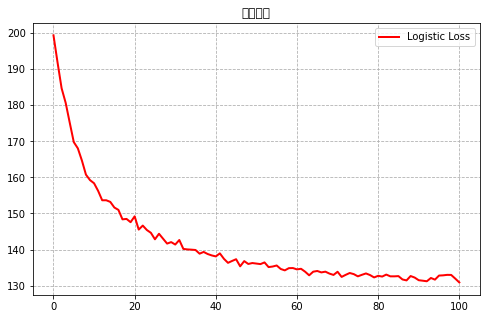

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:906: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:907: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9718, device='cuda:0')
Training Epoch: 0, total loss: 132.182182
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 1, total loss: 131.243617
total_train_accuracy: tensor(0.9597, device='cuda:0')
Training Epoch: 2, total loss: 133.106779
total_train_accuracy: tensor(0.9758, device='cuda:0')
Training Epoch: 3, total loss: 131.767249
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 4, total loss: 130.651863
total_train_accuracy: tensor(0.9745, device='cuda:0')
Training Epoch: 5, total loss: 131.247115
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 6, total loss: 131.253952
total_train_accuracy: tensor(0.9758, device='cuda:0')
Training Epoch: 7, total loss: 131.528027
total_train_accuracy: tensor(0.9778, device='cuda:0')
Training Epoch: 8, total loss: 131.119843
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 9, total loss: 130.513055
total_train_ac

total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 85, total loss: 130.144427
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 86, total loss: 130.608724
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 87, total loss: 130.548708
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 88, total loss: 130.375773
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 89, total loss: 130.589450
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 90, total loss: 130.240611
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 91, total loss: 130.531137
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 92, total loss: 129.989365
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 93, total loss: 130.789921
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 94, total loss: 130.399945
total_train_accuracy: tensor(0

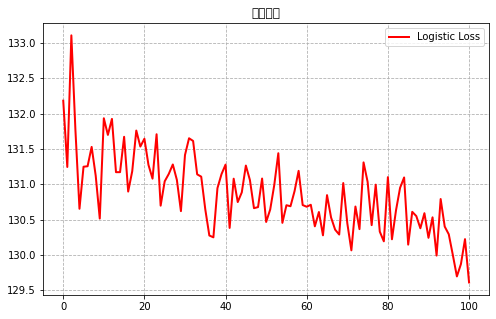

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9892, device='cuda:0')
Training Epoch: 0, total loss: 129.513010
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 1, total loss: 130.087387
total_train_accuracy: tensor(0.9785, device='cuda:0')
Training Epoch: 2, total loss: 130.565723
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 3, total loss: 130.623457
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 4, total loss: 130.152242
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 5, total loss: 130.355211
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 6, total loss: 130.796968
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 7, total loss: 130.380224
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training

total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 83, total loss: 129.982851
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 84, total loss: 129.898713
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 85, total loss: 130.118602
total_train_accuracy: tensor(0.9785, device='cuda:0')
Training Epoch: 86, total loss: 130.660949
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 87, total loss: 130.132501
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 88, total loss: 130.380627
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 89, total loss: 130.472171
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 90, total loss: 130.201380
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 91, total loss: 129.883901
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 92, total loss: 130.460663
total_train_accuracy: tensor(0

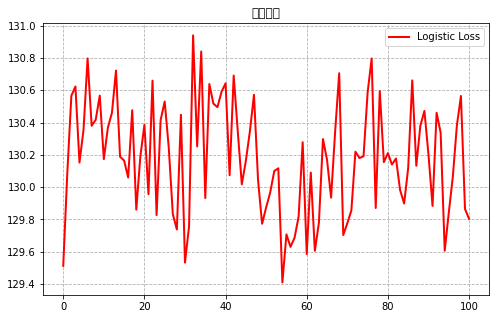

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 0, total loss: 130.003654
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 1, total loss: 129.967167
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 2, total loss: 129.752142
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 3, total loss: 130.115206
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 4, total loss: 130.461781
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 5, total loss: 130.125018
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 6, total loss: 130.173010
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 7, total loss: 129.665253
total_train_accuracy: tensor(0.9772, device='cuda:0')
Training

total_train_accuracy: tensor(0.9738, device='cuda:0')
Training Epoch: 83, total loss: 130.879069
total_train_accuracy: tensor(0.9765, device='cuda:0')
Training Epoch: 84, total loss: 130.777079
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 85, total loss: 129.782713
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 86, total loss: 130.367988
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 87, total loss: 129.545347
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 88, total loss: 129.923929
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 89, total loss: 129.777478
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 90, total loss: 129.662034
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 91, total loss: 129.270892
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 92, total loss: 130.027664
total_train_accuracy: tensor(0

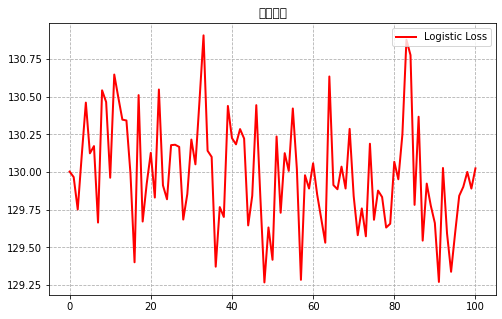

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 0, total loss: 130.027881
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 1, total loss: 129.618405
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 2, total loss: 129.678440
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 3, total loss: 130.568382
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 4, total loss: 129.506318
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 5, total loss: 129.744712
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 6, total loss: 129.751743
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 7, total loss: 130.228729
total_train_accuracy: tensor(0.9926, device='cuda:0')
Training

total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 83, total loss: 129.950736
total_train_accuracy: tensor(0.9919, device='cuda:0')
Training Epoch: 84, total loss: 129.311552
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 85, total loss: 129.757651
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 86, total loss: 129.810331
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 87, total loss: 130.010368
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 130.476418
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 89, total loss: 129.565487
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 90, total loss: 129.728100
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 91, total loss: 129.757753
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 92, total loss: 129.813866
total_train_accuracy: tensor(0

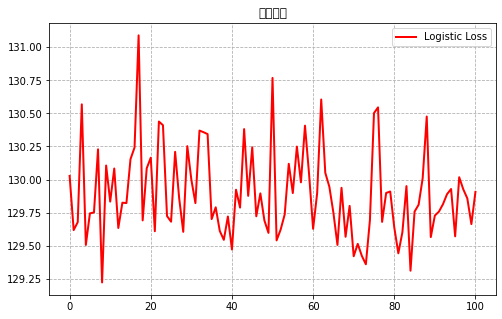

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(0.9938, device='cuda:0')
acc_test_each_k: tensor(0.9938, device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 0, total loss: 130.291144
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 1, total loss: 130.035483
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 2, total loss: 129.801758
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 3, total loss: 130.046748
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 4, total loss: 130.057759
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 5, total loss: 130.477283
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 6, total loss: 129.427729
total_train_accuracy: tensor(0.9906, device='cuda:0')
Training Epoch: 7, total loss: 129.475540
total_train_accuracy: tensor(0.9899, device='cuda:0')


total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 83, total loss: 129.841341
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 84, total loss: 129.862098
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 85, total loss: 129.427343
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 86, total loss: 129.675489
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 87, total loss: 129.950695
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 88, total loss: 129.462458
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 89, total loss: 129.935055
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 90, total loss: 129.793142
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 91, total loss: 129.252573
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 92, total loss: 129.868040
total_train_accuracy: tensor(0

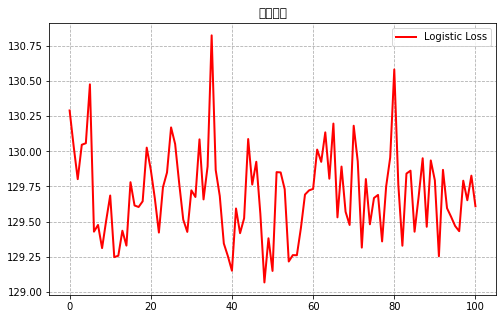

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(0.9875, device='cuda:0')
acc_test_each_k: tensor(0.9875, device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 0, total loss: 129.599517
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 1, total loss: 129.913206
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 2, total loss: 129.924449
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 3, total loss: 129.883195
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 4, total loss: 129.481275
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 5, total loss: 129.637342
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 6, total loss: 129.678336
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 7, total loss: 129.320074
total_train_accuracy: tensor(0.9845, device='cuda:0')


total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 83, total loss: 129.916043
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 84, total loss: 129.912501
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 85, total loss: 129.502491
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 86, total loss: 129.738358
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 87, total loss: 129.337642
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 88, total loss: 129.422665
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 89, total loss: 129.813533
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 90, total loss: 129.837769
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 91, total loss: 129.721674
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 130.334272
total_train_accuracy: tensor(0

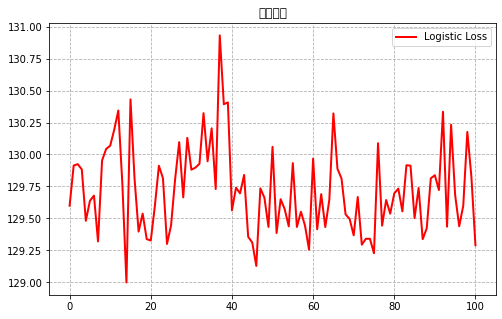

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(0.9938, device='cuda:0')
acc_test_each_k: tensor(0.9938, device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 0, total loss: 129.949644
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 1, total loss: 129.273924
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 2, total loss: 129.063504
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 3, total loss: 129.627443
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 4, total loss: 129.387004
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 5, total loss: 129.718769
total_train_accuracy: tensor(0.9906, device='cuda:0')
Training Epoch: 6, total loss: 129.382238
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 7, total loss: 129.548683
total_train_accuracy: tensor(0.9812, device='cuda:0')


total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 83, total loss: 129.458004
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 84, total loss: 129.753950
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 85, total loss: 129.715790
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 86, total loss: 129.210699
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 87, total loss: 129.244290
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 88, total loss: 129.500071
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 89, total loss: 129.363161
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 90, total loss: 129.678980
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 91, total loss: 130.031185
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training Epoch: 92, total loss: 129.643987
total_train_accuracy: tensor(0

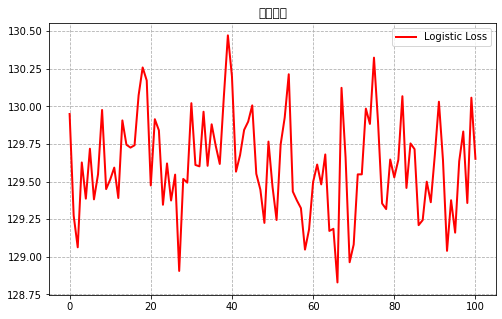

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(0.9875, device='cuda:0')
acc_test_each_k: tensor(0.9875, device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 0, total loss: 129.898650
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 1, total loss: 130.093707
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 2, total loss: 129.454652
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 3, total loss: 129.434013
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 4, total loss: 129.835785
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 5, total loss: 129.684792
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 6, total loss: 129.505179
total_train_accuracy: tensor(0.9825, device='cuda:0')
Training Epoch: 7, total loss: 130.106990
total_train_accuracy: tensor(0.9758, device='cuda:0')


total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 83, total loss: 129.394251
total_train_accuracy: tensor(0.9765, device='cuda:0')
Training Epoch: 84, total loss: 130.277181
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 85, total loss: 129.835576
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 86, total loss: 129.679176
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 87, total loss: 129.482408
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 88, total loss: 129.964584
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 89, total loss: 129.243979
total_train_accuracy: tensor(0.9805, device='cuda:0')
Training Epoch: 90, total loss: 130.065424
total_train_accuracy: tensor(0.9832, device='cuda:0')
Training Epoch: 91, total loss: 129.911174
total_train_accuracy: tensor(0.9859, device='cuda:0')
Training Epoch: 92, total loss: 129.558271
total_train_accuracy: tensor(0

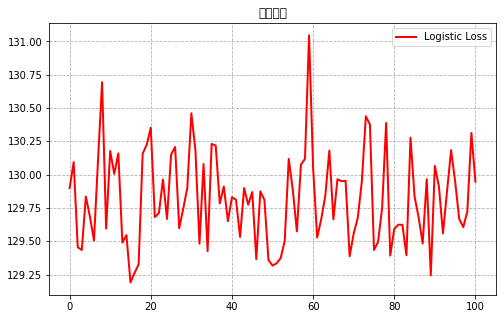

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
(1669, 3301)
(1669, 3301)
total_train_accuracy: tensor(0.9852, device='cuda:0')
Training Epoch: 0, total loss: 129.628744
total_train_accuracy: tensor(0.9872, device='cuda:0')
Training Epoch: 1, total loss: 129.588216
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 2, total loss: 129.822137
total_train_accuracy: tensor(0.9886, device='cuda:0')
Training Epoch: 3, total loss: 129.425517
total_train_accuracy: tensor(0.9798, device='cuda:0')
Training Epoch: 4, total loss: 130.492236
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 5, total loss: 129.707236
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 6, total loss: 129.643351
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 7, total loss: 129.499923
total_train_accuracy: tensor(0.9879, device='cuda:0')
Training

total_train_accuracy: tensor(0.9892, device='cuda:0')
Training Epoch: 83, total loss: 129.448228
total_train_accuracy: tensor(0.9839, device='cuda:0')
Training Epoch: 84, total loss: 130.110607
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 85, total loss: 129.610532
total_train_accuracy: tensor(0.9866, device='cuda:0')
Training Epoch: 86, total loss: 129.616853
total_train_accuracy: tensor(0.9845, device='cuda:0')
Training Epoch: 87, total loss: 129.696965
total_train_accuracy: tensor(0.9906, device='cuda:0')
Training Epoch: 88, total loss: 129.148424
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 89, total loss: 130.137642
total_train_accuracy: tensor(0.9819, device='cuda:0')
Training Epoch: 90, total loss: 130.040697
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 91, total loss: 130.298129
total_train_accuracy: tensor(0.9899, device='cuda:0')
Training Epoch: 92, total loss: 129.261609
total_train_accuracy: tensor(0

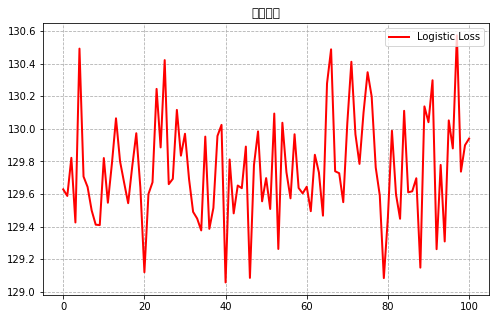

test
test
test
test
test
test
test
test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9938, device='cuda:0'), tensor(0.9875, device='cuda:0'), tensor(0.9938, device='cuda:0'), tensor(0.9875, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.99375004, dtype=float32), array(0.9875, dtype=float32), array(0.99375004, dtype=float32), array(0.9875, dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.99625


In [22]:
#_,model=MLPA().cuda
'''
inn_model = InnvestigateModel(model1, lrp_exponent=2,
                              method="e-rule",
                              beta=.5)

'''


#para0.6_0.4_0: 0.91.2  97.1

#para06_0.4_0.1_0.2:92.6,97.1

#para0.4_0.6_0.2_0.1:


#para0.4_0.6_0:               94.1,97.1:10210.pkl

#paa0.5_0.8_0.1_0.1:92.6
#para0.5_0.6_0.1_0.1:92.2
#para0.6_0.2_0:0.90625

#0.4_0:8610.pkl  94.1  97.1

#para0.3_0.6_0(uninform):8410.pkl, 94.1,97.1
#para0.3_0.6_0.1_0.2(uniform):91.2  97.1



import itertools


K=10
num=0
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    #trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/para0.4_0.8_0/all_aug_train_val_info_3301.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    #valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/para0.4_0.8_0/all_aug_train_val_info_3301.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/aug_model/para_gause_0.3_0.1_0.6_0.2/all_aug_train_val_info_3301.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/aug_model/para_gause_0.3_0.1_0.6_0.2/all_aug_train_val_info_3301.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    
    
    
    
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.3_0.1_0.6_0.2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    
   
    model_named_parameters=[j for j in model.named_parameters()]
    #print('model_parameters:',model_named_parameters)
    #print('model.state.dict:',model.state_dict())
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %10==0:
            num=num+1
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    
    train_loss_total_list=[]
    acc_test=val_epoch(val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)

#print(list(mlp.named_parameters()))

path=os.path.join(model_path,'MLP'+str(num)+str(12345)+'.pkl')
torch.save(model.state_dict(),path)

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def plotAcc(len_list,acc_score_list):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    #x=[i for i in range(lenth)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(len_list, acc_score_list, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
    
testset_guan = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoguan/test_info.csv')
   
test_loader_guan = data.DataLoader(
         dataset=testset_guan,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )

testset_qiu = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu/test_info.csv')
   
test_loader_qiu = data.DataLoader(
         dataset=testset_qiu,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
input_num=3300

/home/zhengfang/NFM-pyorch-master/NFM-pyorch-master/train_val_test.py:374: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=torch.tensor(inputs,dtype=torch.float)
/home/zhengfang/NFM-pyorch-master/NFM-pyorch-master/train_val_test.py:376: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets=torch.tensor(targets,dtype=torch.float)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotli

dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.4_0.2_0.6_0.2/MLP7910.pkl
acturals: (64, 9)
yhat: (64, 9)
0.9375
0 dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.4_0.2_0.6_0.2/MLP7910.pkl 0.9375


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


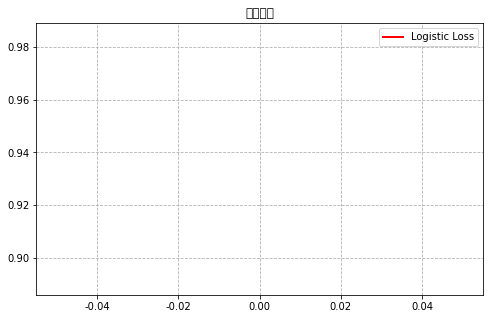

In [5]:
from PlotCurves import plotGraph,plotLoss,plotMatrix
from train_val_test import evaluate_model
import os
#path_dir='dataset/qiuguan/origin_800/non_encode_aug/para0.6_0.4_0.3_0.1/'


path_dir='dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.4_0.2_0.6_0.2/'
mlp=MLP()
path_list=[]
acc_score_list=[]
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
pos=0
for parent, _, files in os.walk(path_dir):
    pathes=files
for path_ in pathes:
    if path_.startswith('MLP'):  # 去除隐藏文件


        
        path=os.path.join(path_dir,path_)
        print(path)
        mlp.load_state_dict(torch.load(path),strict=False)
        mlp.cuda()

        net=mlp
        actuals,predictions,acc_test=evaluate_model(test_loader_guan,net,input_num)

       
        target_list=actuals 
        pred_list=predictions 
      
        y_true=target_list 
        y_pred=pred_list 
      

        acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 

        acc_score_list.append(acc_score)
        path_list.append(path)
        pos=pos+1
max_guan=max(acc_score_list)
print(max_guan)
#max_len=len(max_qiu)
max_guan_list=[]
max_guan_len_list=[]
for i,score in enumerate(acc_score_list):
    
    if score==max_guan:
        print(i,path_list[i],score)
        
        max_guan_list.append(score)
        max_guan_len_list.append(i)
#lenth=len(acc_score_list)

plotAcc(max_guan_len_list,max_guan_list)

In [ ]:
path_dir='dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.3_0.1_0.6_0.2/'
mlp=MLP()
acc_score_list=[]
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
pos=0
path_list=[]
for parent, _, files in os.walk(path_dir):
    pathes=files
for path_ in pathes:
    if path_.startswith('MLP'):  # 去除隐藏文件


        #print(path)
        path=os.path.join(path_dir,path_)
        print(path)
        mlp.load_state_dict(torch.load(path),strict=False)
        mlp.cuda()

        net=mlp
        actuals,predictions,acc_test=evaluate_model(test_loader_qiu,net,input_num)

       
        target_list=actuals 
        pred_list=predictions 
      
        y_true=target_list 
        y_pred=pred_list 
      

        acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 

        acc_score_list.append(acc_score)
        path_list.append(path)
        pos=pos+1
        
max_qiu=max(acc_score_list)
print(max_qiu)
#max_len=len(max_qiu)
max_qiu_list=[]
max_qiu_len_list=[]


for i,score in enumerate(acc_score_list):
    
    if score==max_qiu:
        print(i,path_list[i],score)
        
        max_qiu_list.append(score)
        max_qiu_len_list.append(i)
#lenth=len(acc_score_list)

plotAcc(max_qiu_len_list,max_qiu_list)

MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
)


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.9412784860669277
accuracy_score: 0.9411764705882353
recall_score: 0.9369047619047619
pre_recall: 0.9543209876543209
n_classes: 9


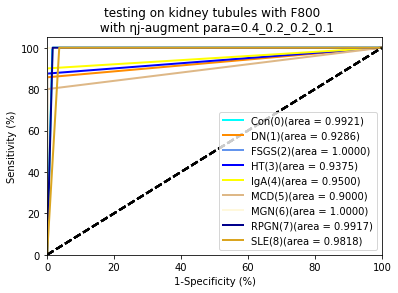

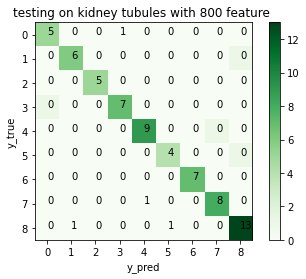

In [2]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/origin_800/non_encode_aug/para0.4_0.8_0//MLP6010.pkl'
#path='dataset/qiuguan/origin_800/non_encode_aug/aug_et/para_gause_0.8_0.5_gause_0.3_0.1/MLP11012345.pkl'
path='dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.4_0.2_0.6_0.2/MLP7910.pkl'
#path='dataset/qiuguan/origin_800/non_encode_aug/para0.4_0.6_0/MLP10210.pkl'
#nfm=NFM(nfm_config)2
mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoguan/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    plt.title('testing on kidney tubules with F800 \n with ηj-augment para=0.4_0.2_0.2_0.1') 
      

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('testing on kidney tubules with 800 feature ')      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()

MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
)


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.9803418803418804
accuracy_score: 0.9714285714285714
recall_score: 0.9797979797979798
pre_recall: 0.9841269841269842
n_classes: 9


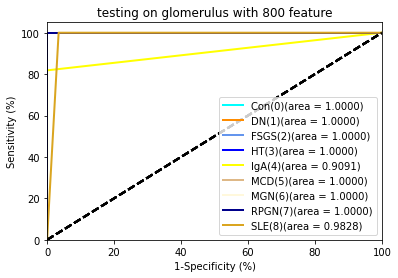

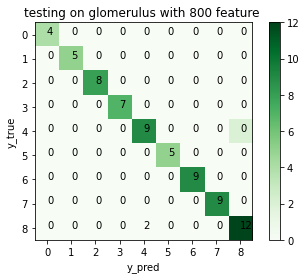

In [3]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/origin_800/non_encode_aug/para0.6_0.4_0.3_0.1/MLP7510.pkl'
#get max value:#path='dataset/qiuguan/origin_800/non_encode_aug/aug_et/para_gause_0.7_0.5_gause_0.1_0.2/MLP7210.pkl'  0.9857
#path='dataset/qiuguan/origin_800/non_encode_aug/aug_et/para_gause_0.8_0.5_gause_0.3_0.1/MLP11012345.pkl'
path='dataset/qiuguan/origin_800/non_encode_aug/aug_model/para_gause_0.4_0.2_0.6_0.2/MLP7910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    plt.title('testing on glomerulus with 800 feature') 
      

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('testing on glomerulus with 800 feature ')       
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()